{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Phytoplankton: {'max_depth': 8, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 60}
Best score for Phytoplankton: 0.910120262182958
Phytoplankton Classification Report:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       191
    Level 10       0.68      0.85      0.75        27
     Level 2       0.67      0.75      0.71         8
     Level 3       0.85      0.92      0.89        38
     Level 4       0.98      0.98      0.98       275
     Level 5       0.98      0.93      0.95        57
     Level 6       0.99      0.90      0.94       104
     Level 7       0.64      0.81      0.72        53
     Level 8       0.89      0.16      0.27        51
     Level 9       0.74      0.95      0.83       103

    accuracy 

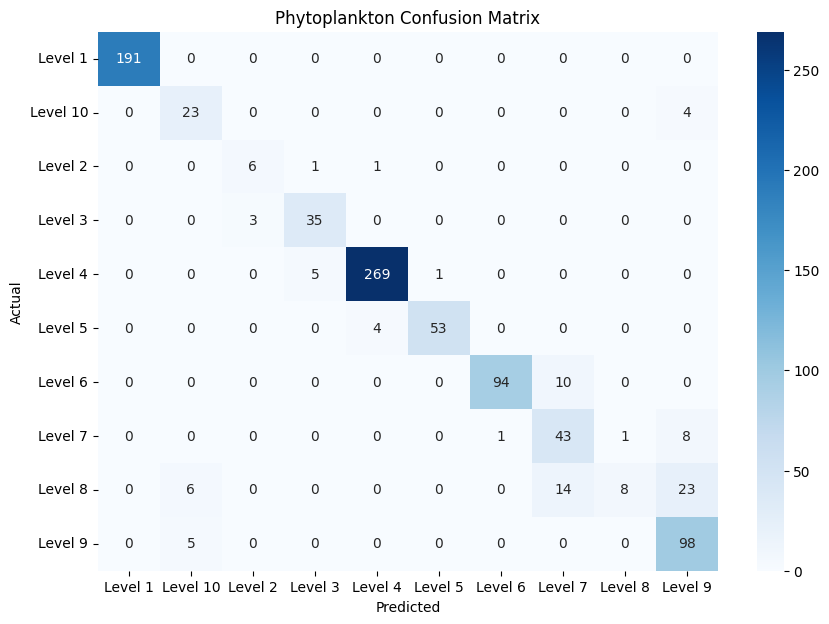

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Zooplankton: {'max_depth': 8, 'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 120}
Best score for Zooplankton: 0.9150827396219245
Zooplankton Classification Report:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       191
    Level 10       1.00      1.00      1.00        16
     Level 2       1.00      1.00      1.00       124
     Level 3       1.00      0.89      0.94        28
     Level 4       0.96      0.91      0.94        80
     Level 5       0.88      0.78      0.83        58
     Level 6       0.58      0.86      0.69        44
     Level 7       0.92      0.85      0.88       156
     Level 8       0.91      0.93      0.92       139
     Level 9       0.97      1.00      0.99        71

    accuracy                           0.93       907
   macro avg       0.92      0.92      0.92       907
weighted avg       0.94      0.93      

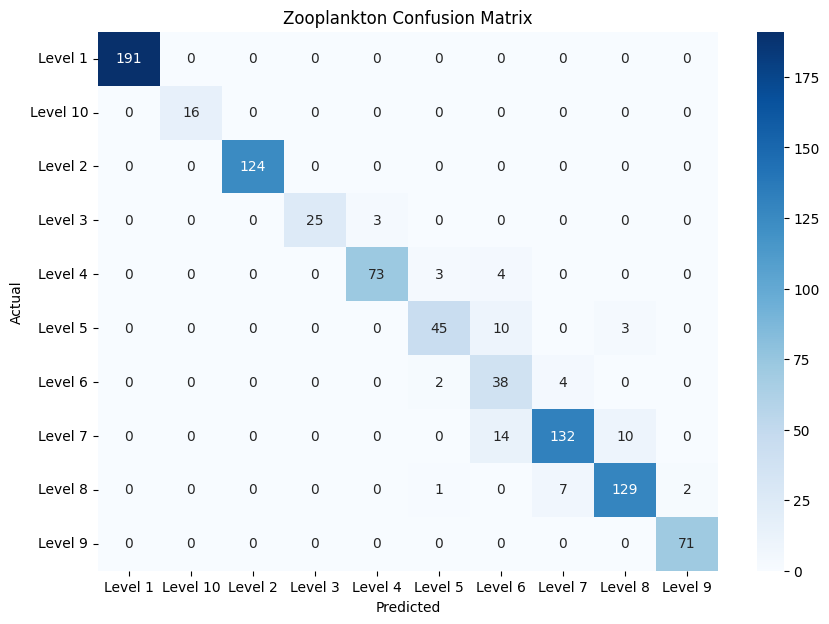

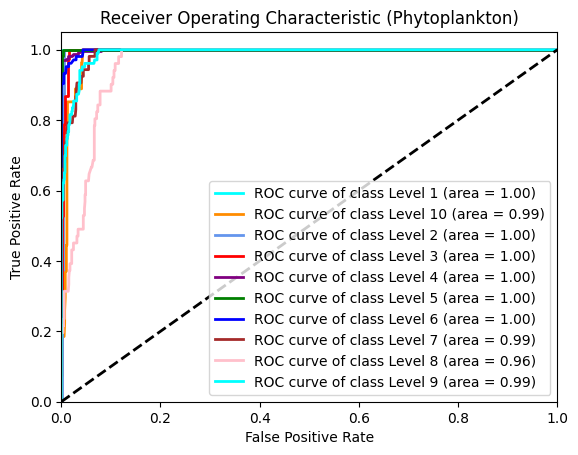

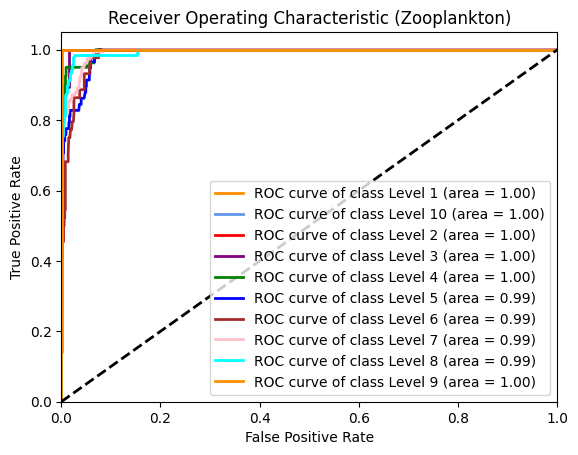

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

# Load the dataset from the CSV file
df = pd.read_csv('6639leveling.csv')

# Features
X = df[['Temp', 'pH', 'TDS', 'Turbidity', 'DO']]

# Labels
y_phyto = df['Phytoplankton']
y_zoo = df['Zooplankton']

# Encode the labels
le_phyto = LabelEncoder()
le_zoo = LabelEncoder()
y_phyto_encoded = le_phyto.fit_transform(y_phyto)
y_zoo_encoded = le_zoo.fit_transform(y_zoo)

# Binarize the labels for ROC curve
y_phyto_binarized = label_binarize(y_phyto_encoded, classes=range(len(le_phyto.classes_)))
y_zoo_binarized = label_binarize(y_zoo_encoded, classes=range(len(le_zoo.classes_)))

# Split the data into training and testing sets
X_train, X_test, y_phyto_train, y_phyto_test, y_zoo_train, y_zoo_test = train_test_split(
    X, y_phyto_encoded, y_zoo_encoded, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [20, 60, 100, 120],
    'max_features': [0.2, 0.6, 1.0],
    'max_depth': [2, 8, None],
    'max_samples': [0.5, 0.75, 1.0]
}
print(param_grid)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for Phytoplankton
rf_grid_phyto = GridSearchCV(estimator=rf,
                             param_grid=param_grid,
                             cv=5,
                             verbose=2,
                             n_jobs=-1,
                             scoring='accuracy')
rf_grid_phyto.fit(X_train, y_phyto_train)

# Print the best parameters and score for Phytoplankton
print("Best parameters for Phytoplankton:", rf_grid_phyto.best_params_)
print("Best score for Phytoplankton:", rf_grid_phyto.best_score_)

# Use the best estimator found by GridSearchCV
best_rf_phyto = rf_grid_phyto.best_estimator_

# Predict and evaluate for Phytoplankton
y_phyto_pred = best_rf_phyto.predict(X_test)
print("Phytoplankton Classification Report:")
print(classification_report(y_phyto_test, y_phyto_pred, target_names=le_phyto.classes_))
print("Phytoplankton Accuracy:", accuracy_score(y_phyto_test, y_phyto_pred))

# Confusion matrix for Phytoplankton
cm_phyto = confusion_matrix(y_phyto_test, y_phyto_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_phyto, annot=True, fmt='d', cmap='Blues', xticklabels=le_phyto.classes_, yticklabels=le_phyto.classes_)
plt.title('Phytoplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Perform GridSearchCV for Zooplankton
rf_grid_zoo = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           verbose=2,
                           n_jobs=-1,
                           scoring='accuracy')
rf_grid_zoo.fit(X_train, y_zoo_train)

# Print the best parameters and score for Zooplankton
print("Best parameters for Zooplankton:", rf_grid_zoo.best_params_)
print("Best score for Zooplankton:", rf_grid_zoo.best_score_)

# Use the best estimator found by GridSearchCV
best_rf_zoo = rf_grid_zoo.best_estimator_

# Predict and evaluate for Zooplankton
y_zoo_pred = best_rf_zoo.predict(X_test)
print("Zooplankton Classification Report:")
print(classification_report(y_zoo_test, y_zoo_pred, target_names=le_zoo.classes_))
print("Zooplankton Accuracy:", accuracy_score(y_zoo_test, y_zoo_pred))

# Confusion matrix for Zooplankton
cm_zoo = confusion_matrix(y_zoo_test, y_zoo_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_zoo, annot=True, fmt='d', cmap='Blues', xticklabels=le_zoo.classes_, yticklabels=le_zoo.classes_)
plt.title('Zooplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Binarize the test labels for ROC curve
y_phyto_test_binarized = label_binarize(y_phyto_test, classes=range(len(le_phyto.classes_)))
y_zoo_test_binarized = label_binarize(y_zoo_test, classes=range(len(le_zoo.classes_)))

# ROC Curve for Phytoplankton
y_phyto_score = best_rf_phyto.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(le_phyto.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_phyto_test_binarized[:, i], y_phyto_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for Phytoplankton
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple', 'green', 'blue', 'brown', 'pink'])
for i, color in zip(range(len(le_phyto.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le_phyto.classes_[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Phytoplankton)')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for Zooplankton
y_zoo_score = best_rf_zoo.predict_proba(X_test)

fpr_zoo = dict()
tpr_zoo = dict()
roc_auc_zoo = dict()
for i in range(len(le_zoo.classes_)):
    fpr_zoo[i], tpr_zoo[i], _ = roc_curve(y_zoo_test_binarized[:, i], y_zoo_score[:, i])
    roc_auc_zoo[i] = auc(fpr_zoo[i], tpr_zoo[i])

# Plot ROC curve for Zooplankton
plt.figure()
for i, color in zip(range(len(le_zoo.classes_)), colors):
    plt.plot(fpr_zoo[i], tpr_zoo[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le_zoo.classes_[i], roc_auc_zoo[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Zooplankton)')
plt.legend(loc="lower right")
plt.show()